In [1]:
####### os, pickle
import os
import pickle


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor

from sklearn.inspection import permutation_importance
import catboost as ctb

import numpy as np
from funciones import* 
from collections import Counter
from imblearn.over_sampling import SMOTE 

In [2]:
from main import X_cat ,y_cat

X_cat: (5111, 6383) y_cat: (5111,)
X: (51646, 10055) y: (51646,)
X_redux: (51646, 10055) y_redux: (51646,)


In [3]:

X_train, X_test, y_train, y_test = train_test_split(
    X_cat, y_cat, test_size=0.33, random_state=42)

oversampling = SMOTE(sampling_strategy=0.30) # usamos oversampling sintético podemos elegir el nivel de oversampling con  sampling_strategy=0.80
X_train_smote, y_train_smote = oversampling.fit_resample(X_train, y_train) #Se obtienen nuevos X e y

In [7]:
 #Creamos el objeto modelo
 cbc = CatBoostRegressor()

In [8]:
#definimos los mejores parámetros según resultado del gridsearch
parametros = {'depth'         : [10],
              'learning_rate' : [ 0.1, 0.2],
              'iterations'    : [30]}

In [9]:
#Aplicamos el modelo catboost con los mejores parámetros
grid = GridSearchCV(estimator=cbc, param_grid = parametros, cv = 2, n_jobs=-1)
grid.fit(X_cat, y_cat)

0:	learn: 0.3120156	total: 141ms	remaining: 4.09s
1:	learn: 0.3066649	total: 276ms	remaining: 3.86s
2:	learn: 0.3013635	total: 409ms	remaining: 3.68s
3:	learn: 0.2976425	total: 539ms	remaining: 3.5s
4:	learn: 0.2946036	total: 677ms	remaining: 3.38s
5:	learn: 0.2926079	total: 814ms	remaining: 3.25s
6:	learn: 0.2895462	total: 954ms	remaining: 3.14s
7:	learn: 0.2870862	total: 1.09s	remaining: 2.99s
8:	learn: 0.2855258	total: 1.25s	remaining: 2.92s
9:	learn: 0.2841419	total: 1.42s	remaining: 2.85s
10:	learn: 0.2825116	total: 1.61s	remaining: 2.78s
11:	learn: 0.2811523	total: 1.77s	remaining: 2.66s
12:	learn: 0.2800874	total: 1.93s	remaining: 2.52s
13:	learn: 0.2790010	total: 2.07s	remaining: 2.37s
14:	learn: 0.2781863	total: 2.22s	remaining: 2.22s
15:	learn: 0.2775237	total: 2.36s	remaining: 2.06s
16:	learn: 0.2767483	total: 2.51s	remaining: 1.92s
17:	learn: 0.2763055	total: 2.64s	remaining: 1.76s
18:	learn: 0.2756997	total: 2.79s	remaining: 1.61s
19:	learn: 0.2750667	total: 2.94s	remainin

GridSearchCV(cv=2,
             estimator=<catboost.core.CatBoostRegressor object at 0x000002A778D43D30>,
             n_jobs=-1,
             param_grid={'depth': [6, 8, 10], 'iterations': [30, 50, 100],
                         'learning_rate': [0.01, 0.05, 0.1]})

In [112]:
grid.best_params_ #aplicamos estos parámetros

{'depth': 10, 'iterations': 30, 'learning_rate': 0.1}

In [113]:
grid.best_estimator_.feature_importances_

array([ 0.        , 20.9121428 ,  0.02820547, ...,  0.        ,
        0.        ,  0.        ])

In [132]:
dfi = pd.DataFrame()
dfi['importanciaGrid']= grid.best_estimator_.feature_importances_
dfi['Categorías']= X_cat.columns

Text(0.5, 1.0, 'Feature Importance')

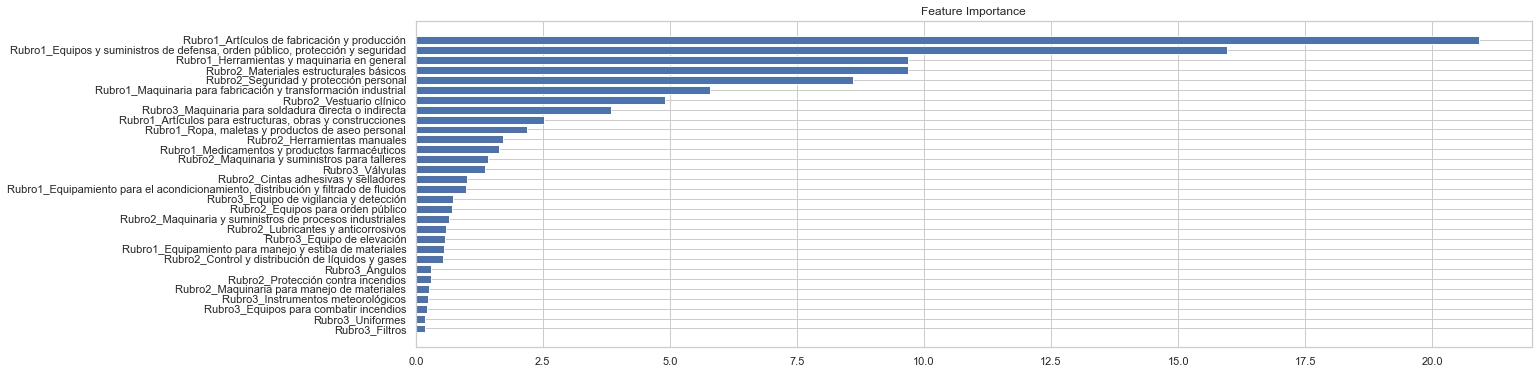

In [133]:
df_imp=dfi.sort_values("importanciaGrid", ascending = False).iloc[0:30]
feature_importanc = df_imp.importanciaGrid
nombres = df_imp.Categorías
fig = plt.figure(figsize=(20, 6))
plt.barh(range(len(nombres),0,-1), feature_importanc, align='center')
plt.yticks(range(len(nombres),0,-1),nombres)
plt.title('Feature Importance')

In [134]:
dfi = pd.DataFrame()
dfi['importanciaGrid']= grid.best_estimator_.feature_importances_
dfi['Categorías']= X_cat.columns
dfi. sort_values('importanciaGrid',ascending=False).head(20)

,importanciaGrid,Categorías
1,20.912143,Rubro1_Artículos de fabricación y producción
12,15.968482,"Rubro1_Equipos y suministros de defensa, orden..."
17,9.685919,Rubro1_Herramientas y maquinaria en general
221,9.682849,Rubro2_Materiales estructurales básicos
305,8.605780,Rubro2_Seguridad y protección personal
21,5.789783,Rubro1_Maquinaria para fabricación y transform...
359,4.897366,Rubro2_Vestuario clínico
1115,3.848828,Rubro3_Maquinaria para soldadura directa o ind...
3,2.518733,"Rubro1_Artículos para estructuras, obras y con..."
36,2.188740,"Rubro1_Ropa, maletas y productos de aseo personal"


c:\Users\diana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='importanciaGrid'>

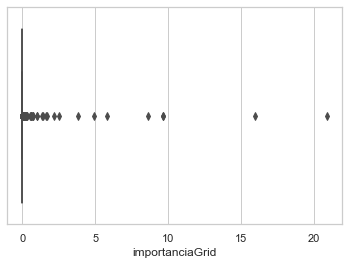

In [135]:
sns.set_theme(style="whitegrid")
sns.boxplot(dfi['importanciaGrid'])

df['Rubro1'].unique().size == 56 <br>
df['Rubro2'].unique().size == 307<br>
df['Rubro3'].unique().size == 1284